# Loading data and first processing steps 

It's a dataset that collects the TGV regularity on a monthly basis from January 2018 to June 2021 organised by the operated routes.
Among other things it collects data about train ride durations, delays and reasons for delays.

source of the dataset: https://ressources.data.sncf.com/explore/dataset/regularite-mensuelle-tgv-aqst/information/?sort=date

First I want to get an overview over the csv file of the dataset.
So I import all necessary packages and read the csv file.

In [1]:
import pandas as pd 
import numpy as np
import json 
import csv 
from pandas.core.frame import DataFrame 

df = pd.read_csv('regularite-mensuelle-tgv-aqst.csv', sep=';')
columns = df.shape[1]
index = df.index
rows = len(index)
print("Number of columns is:", columns)
print("Number of rows is:", rows)
sliced_df = df.head(5)
sliced_df = sliced_df.append(df.tail(5))
##delayed_trains_numbers = [col for col in df.columns if 'Nombre' in col]
##sliced_df = sliced_df.filter(delayed_trains_numbers)
sliced_df

Number of columns is: 26
Number of rows is: 5235


,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,...,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
0,2018-01,National,ANGOULEME,PARIS MONTPARNASSE,125,270,4,NaN,135,5.710123,...,33,6.464975,9,0,26.923077,42.307692,9.615385,15.384615,3.846154,1.923077
1,2018-01,National,PARIS MONTPARNASSE,LA ROCHELLE VILLE,166,226,0,NaN,21,6.239683,...,11,2.938053,6,1,22.222222,27.777778,16.666667,16.666667,5.555556,11.111111
2,2018-01,National,PARIS MONTPARNASSE,LAVAL,84,217,0,NaN,32,11.609375,...,16,5.822811,5,2,24.242424,54.545455,3.030303,12.121212,3.030303,3.030303
3,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
4,2018-01,National,RENNES,LYON PART DIEU,233,99,0,NaN,23,3.000000,...,6,2.244613,2,1,0.000000,50.000000,25.000000,25.000000,0.000000,0.000000
5230,2021-06,National,PARIS NORD,LILLE,68,492,0,NaN,54,12.565432,...,20,38.800833,10,4,37.209302,13.953488,2.325581,4.651163,16.279070,25.581395
5231,2021-06,National,QUIMPER,PARIS MONTPARNASSE,228,235,0,NaN,10,10.790000,...,22,36.421212,12,2,23.529412,64.705882,0.000000,5.882353,5.882353,0.000000
5232,2021-06,National,REIMS,PARIS EST,46,206,0,NaN,41,6.278049,...,9,48.772222,7,4,31.818182,45.454545,4.545455,4.545455,9.090909,4.545455
5233,2021-06,National,STRASBOURG,PARIS EST,123,384,1,NaN,117,6.847009,...,27,53.521605,15,7,20.000000,30.000000,20.000000,6.666667,10.000000,13.333333
5234,2021-06,National,TOURS,PARIS MONTPARNASSE,77,150,0,NaN,9,7.244444,...,4,25.900000,1,0,7.142857,7.142857,42.857143,14.285714,7.142857,21.428571


The Dataset looked pretty well cleaned in the sense that there a little empty lines or not collected values. So I try to replace the remaining empty cells by NaN and try to get an overview of columns with missing values by counting the amount of NaNs by column.

In [2]:
import pandas as pd 
import numpy as np
from pandas.core.frame import DataFrame 

df.replace(r'^\s*$', np.nan, regex=True)
##df = df.filter(['Commentaire annulations'])
print("Total number of rows is:", rows)
print(df.isnull().sum().sort_values(ascending = False).head(15))
## print(df.isnull().sum().sum()) 
print(len(df.columns))
print(df.columns)

Total number of rows is: 5235
Commentaire annulations                                                 5235
Commentaire retards au départ                                           5235
Commentaire retards à l'arrivée                                         4537
Date                                                                       0
Retard moyen de tous les trains à l'arrivée                                0
Prct retard pour cause gestion en gare et réutilisation de matériel        0
Prct retard pour cause matériel roulant                                    0
Prct retard pour cause gestion trafic                                      0
Prct retard pour cause infrastructure                                      0
Prct retard pour causes externes                                           0
Nombre trains en retard > 60min                                            0
Nombre trains en retard > 30min                                            0
Retard moyen trains en retard > 15 (si liaison

We see that there are no comments on annulations and the delays at departure at all. All other columns not containing these delay comments don't have any NaN values at all. 
Since I also don't want to work with these string valued comments I'm going to drop the coloumns.

In [3]:
import pandas as pd 
import numpy as np
from pandas.core.frame import DataFrame 

#df.drop('Date', axis='columns', inplace=True)
#df.filter([0], regex=r'(Commentaire)', axis=0)
#df.columns = [c.replace(' ', '_') for c in df.columns]
#df.drop(['Commentaire_annulations'],axis=1, inplace=True)

#print(len(df.columns))
#df

# (small) outlier analysis 

Using a boxplot I try to see which attributes have many outliers or how the distribution of values is in general.


<AxesSubplot:>

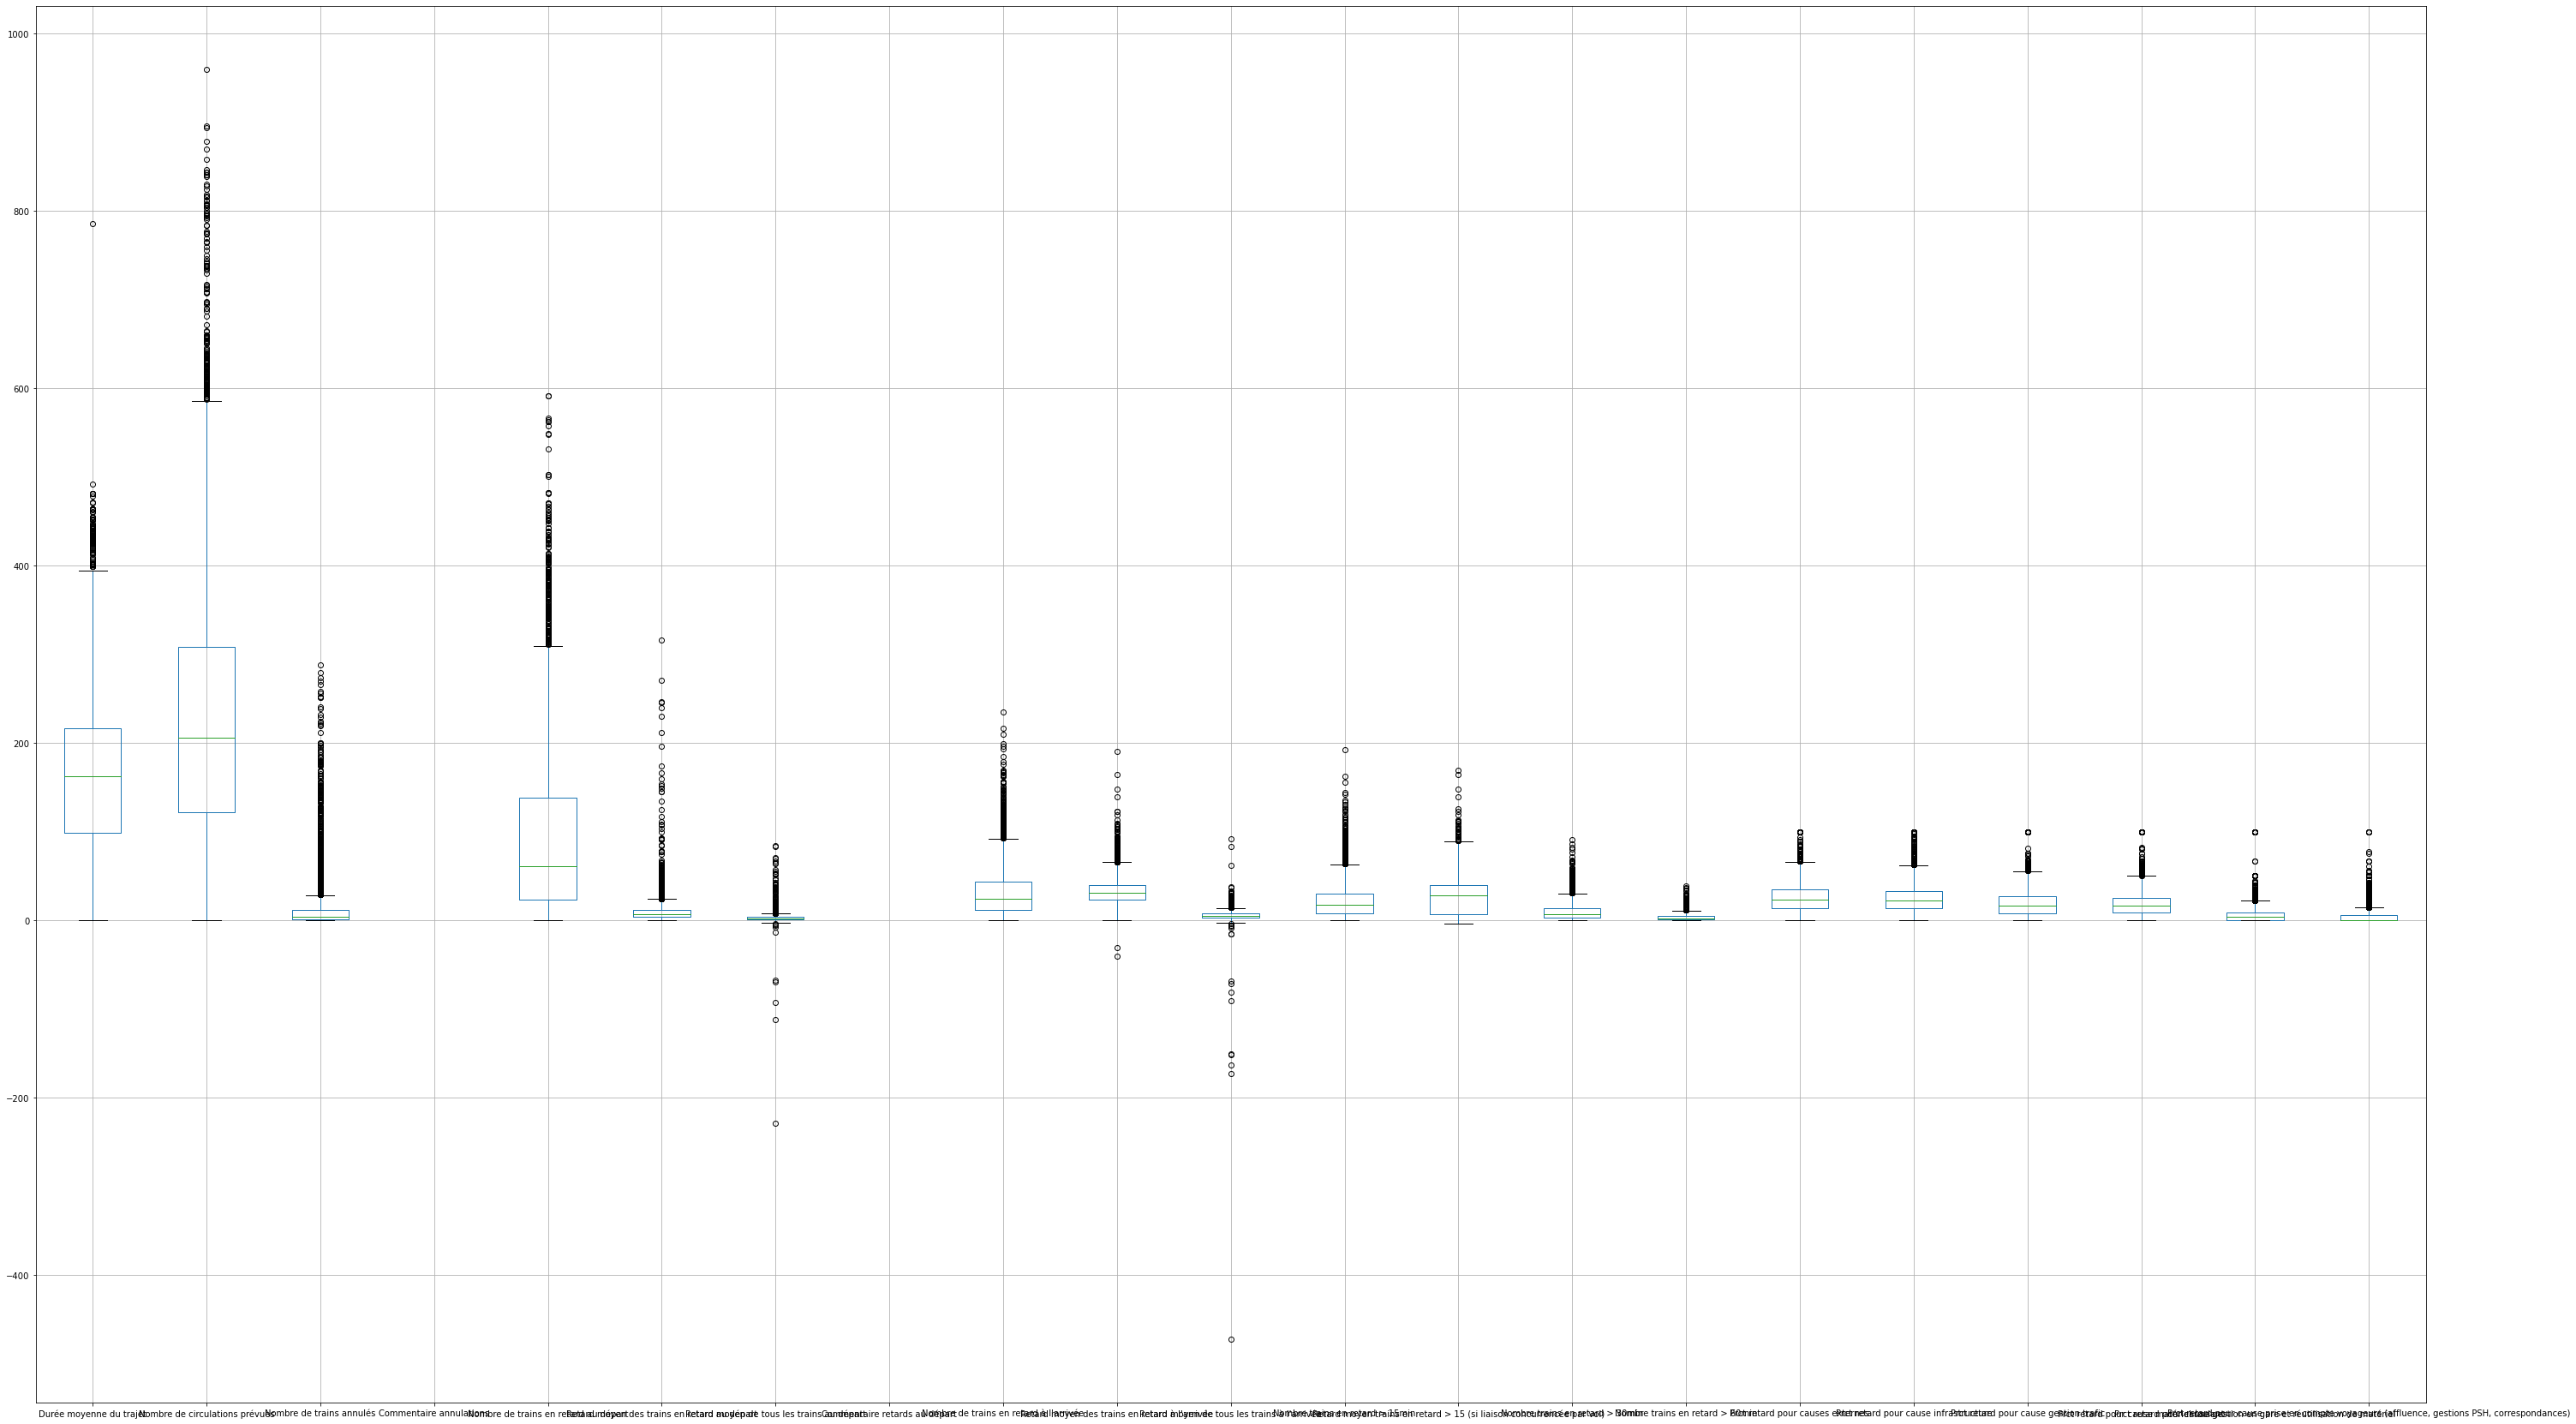

In [4]:
import pandas as pd 
import numpy as np
from pandas.core.frame import DataFrame 
%matplotlib inline

df.boxplot(figsize=(50,30))


One can kind of see that all the attributes have big outliers.
Next up I'll try to normalize the data with Standard deviation and min/max normalization.

/var/folders/qz/78hf7r2d1177qhcbwpg8t6gr0000gn/T/ipykernel_4188/179646667.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized = (df-df.mean())/df.std()


Number of rows before discarding outliers = 5235


,Commentaire annulations,Commentaire retards au départ,Commentaire retards à l'arrivée,Date,Durée moyenne du trajet,Gare d'arrivée,Gare de départ,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,...,Prct retard pour cause infrastructure,Prct retard pour cause matériel roulant,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)",Prct retard pour causes externes,Retard moyen de tous les trains au départ,Retard moyen de tous les trains à l'arrivée,Retard moyen des trains en retard au départ,Retard moyen des trains en retard à l'arrivée,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Service
0,NaN,NaN,NaN,NaN,-0.493489,NaN,NaN,0.212457,-0.320423,0.433932,...,1.073102,-0.182477,-0.306708,0.102871,-0.021322,0.115772,-0.297454,-0.732814,-0.967262,NaN
1,NaN,NaN,NaN,NaN,-0.018030,NaN,NaN,-0.061516,-0.456392,-0.767484,...,0.220740,-0.094165,0.845209,-0.162537,-0.445283,-0.257332,-0.260688,-0.507052,-1.142559,NaN
2,NaN,NaN,NaN,NaN,-0.968949,NaN,NaN,-0.117556,-0.456392,-0.651557,...,1.791000,-0.407271,-0.167894,-0.048478,-0.260629,0.047839,0.112126,-1.119685,-0.999179,NaN
3,NaN,NaN,NaN,NaN,0.608186,NaN,NaN,0.075470,-0.422400,-0.598864,...,0.847477,0.082459,-0.547807,0.102871,-0.331962,0.233617,-0.034233,1.467885,-0.913413,NaN
4,NaN,NaN,NaN,NaN,0.758941,NaN,NaN,-0.852301,-0.456392,-0.746406,...,1.524352,0.479862,-0.547807,-1.417190,-0.380438,-0.330689,-0.485616,0.470448,-1.177025,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,NaN,NaN,NaN,NaN,-1.154494,NaN,NaN,1.594774,-0.456392,-0.419705,...,-0.590229,-0.921833,2.659370,0.683625,-0.305018,-0.385045,0.178504,-0.589645,0.639917,NaN
5231,NaN,NaN,NaN,NaN,0.700958,NaN,NaN,-0.005476,-0.456392,-0.883410,...,2.387037,-0.837024,-0.547807,-0.088734,-0.415722,-0.038880,0.055237,0.534484,0.521643,NaN
5232,NaN,NaN,NaN,NaN,-1.409619,NaN,NaN,-0.186049,-0.456392,-0.556709,...,1.257704,-0.929114,0.022063,0.379245,-0.277238,-0.255298,-0.258024,-0.429122,1.135521,NaN
5233,NaN,NaN,NaN,NaN,-0.516682,NaN,NaN,0.922296,-0.422400,0.244235,...,0.351101,-0.782998,1.123813,-0.288002,-0.152345,-0.168156,-0.218521,1.063640,1.371578,NaN


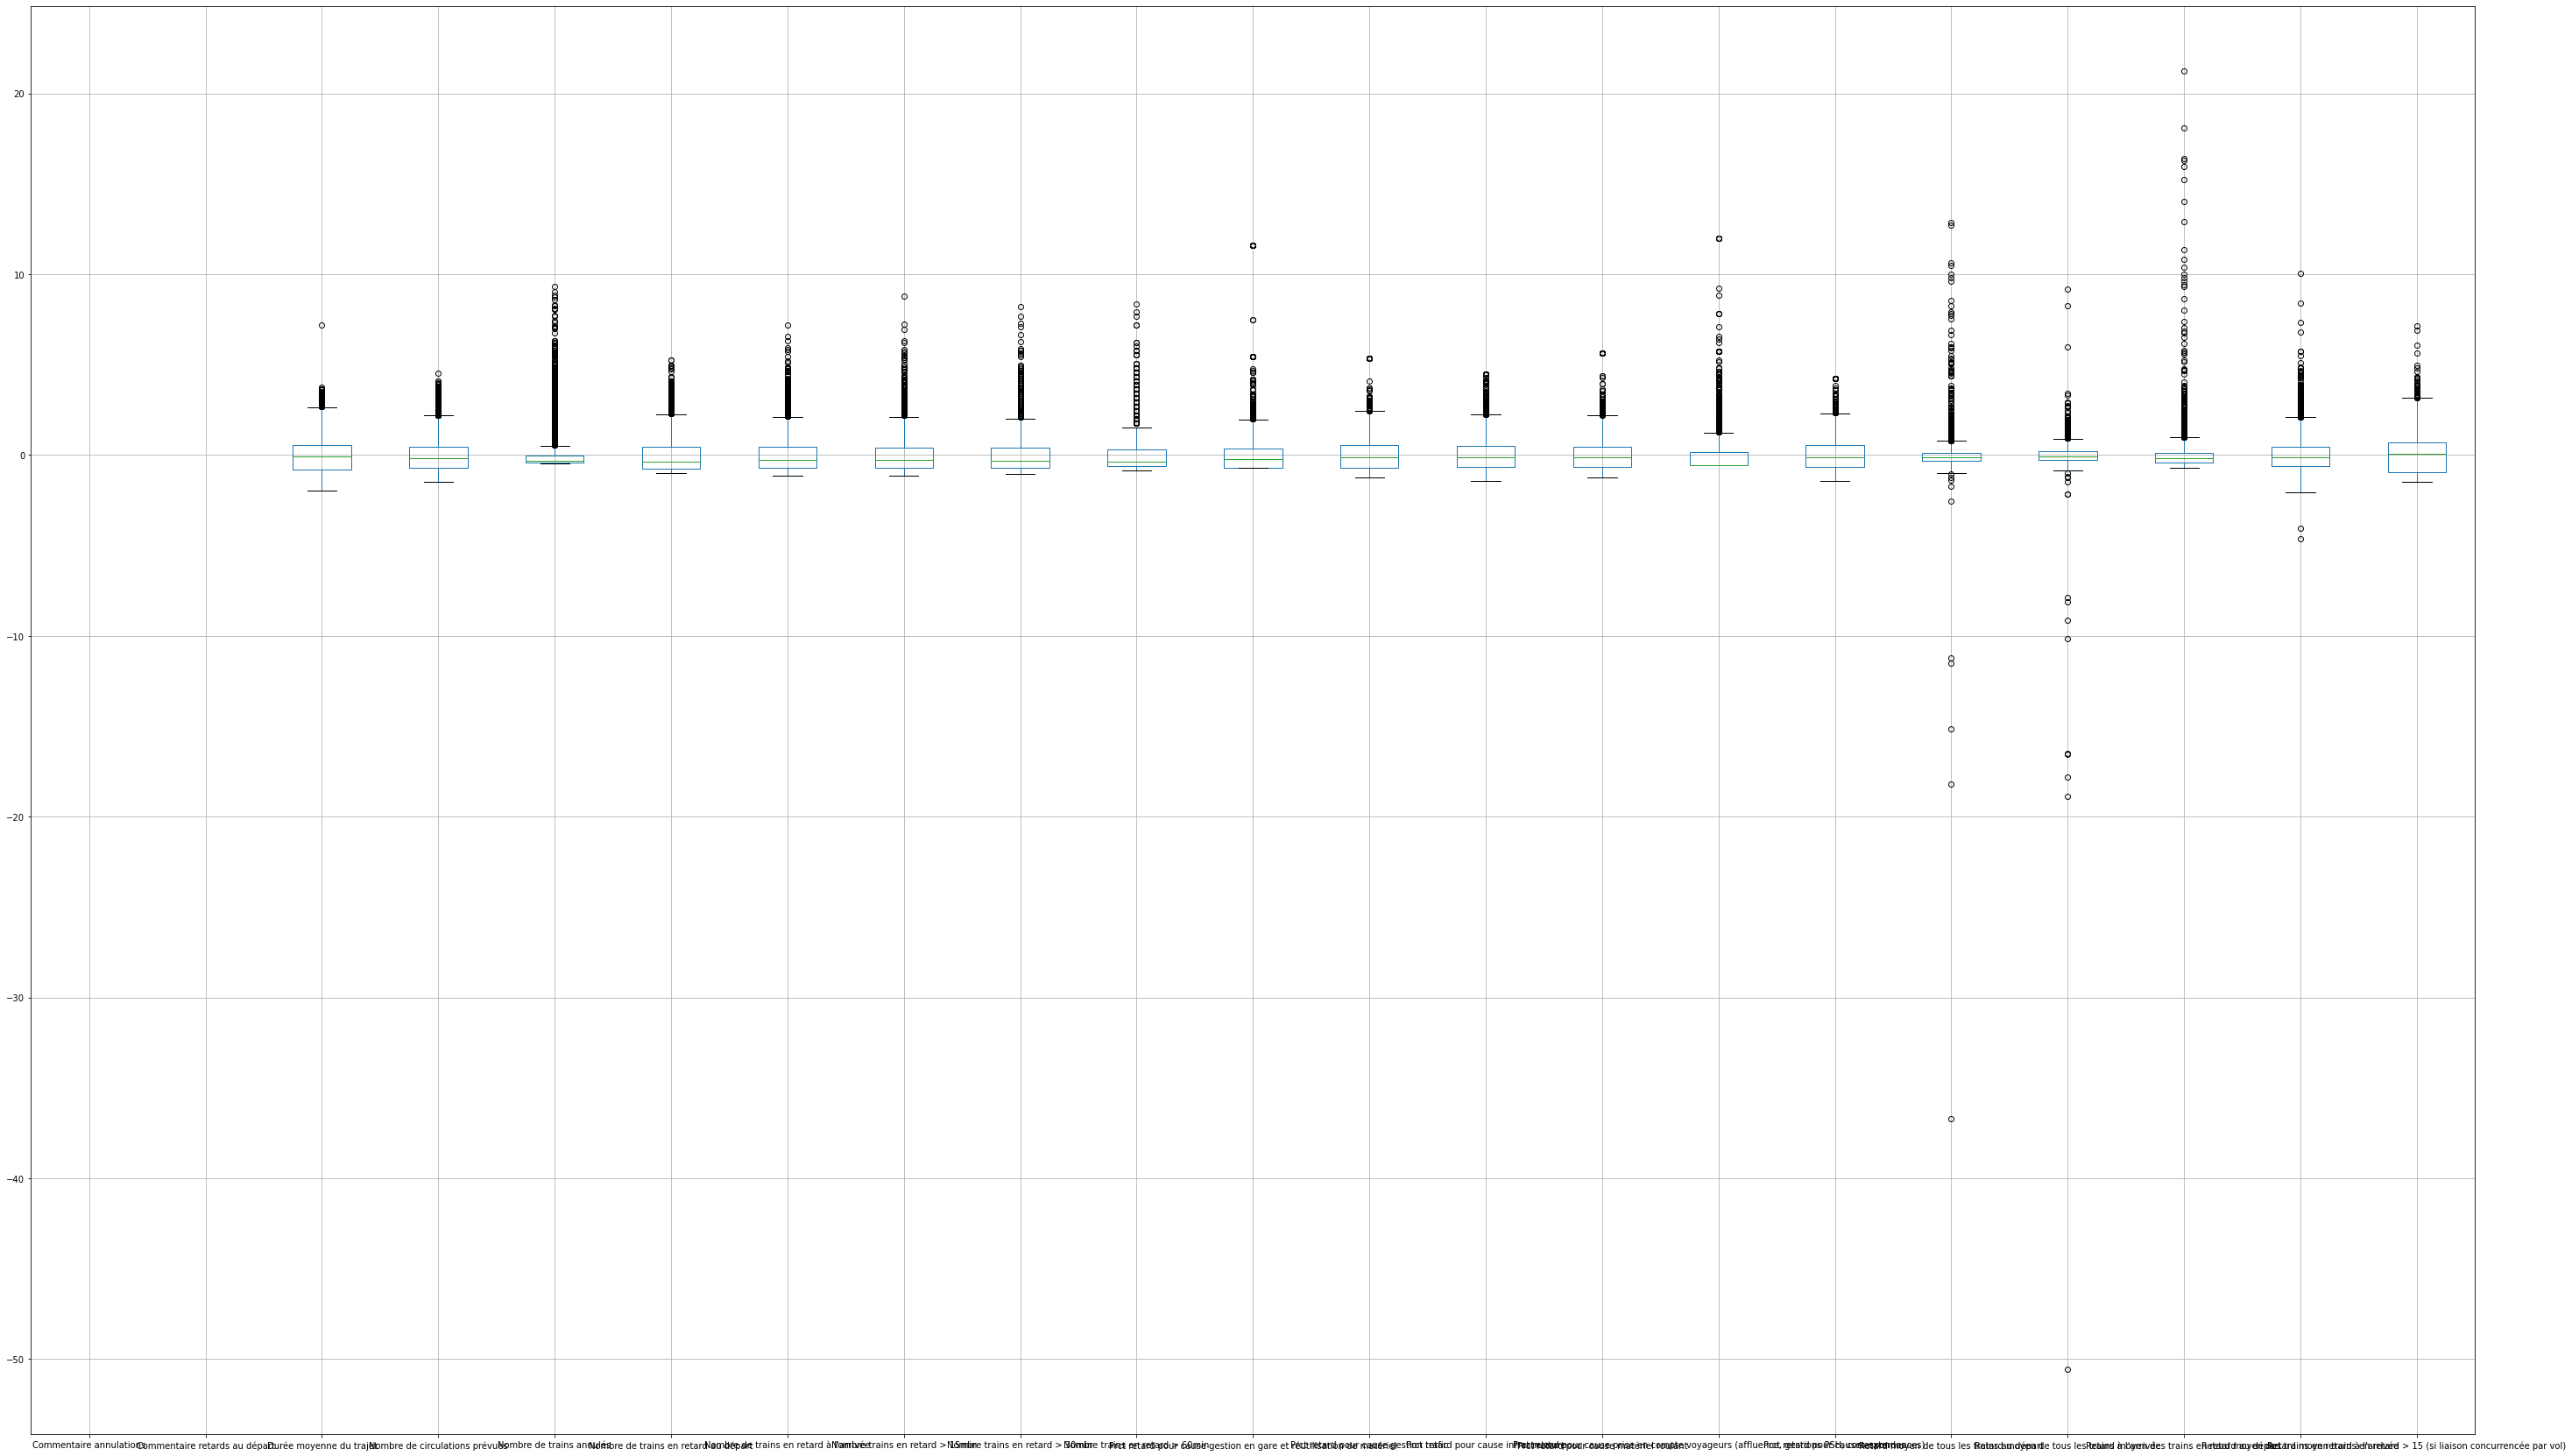

In [5]:
import pandas as pd 
import numpy as np
from pandas.core.frame import DataFrame 
%matplotlib inline

normalized = (df-df.mean())/df.std()
normalized.boxplot(figsize=(50,30))
print('Number of rows before discarding outliers = %d' % (normalized.shape[0]))
normalized

In [6]:

normalized_df=(df-df.min())/(df.max()-df.min())

/var/folders/qz/78hf7r2d1177qhcbwpg8t6gr0000gn/T/ipykernel_4188/3071562506.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_df=(df-df.min())/(df.max()-df.min())


TypeError: unsupported operand type(s) for -: 'str' and 'str'

I was really struggling with the normalization, I think data types made it so difficult. Also looking at fewer attributes at a time would make it more easier.

Next up I'll try some filter functions and try maybe some PCA?

In [ ]:
import pandas as pd 
import numpy as np
from pandas.core.frame import DataFrame 

delays_data = df.filter(items=['Date', 'Gare de départ',"Gare d'arrivée", 'Nombre de trains annulés','Nombre de trains en retard au départ',  "Nombre de trains en retard à l'arrivée","Retard moyen des trains en retard à l'arrivée"])
print(len(delays_data.columns))
delays_data


In [ ]:
pca_data = delays_data.filter(items=['Date', 'Gare de départ',"Gare d'arrivée","Nombre de trains en retard à l'arrivée"])
pca_data

I gave up first of all on trying to do PCA, I would consider after thinking about again which attributes to look at to get intresting results.
Also handling of non-numeric values needs consideration again.

# Clustering

I'll try to do some KMeans Clustering.
My idea is to compare departure train Stations and number of trains with delays.
It would be interesting to find groups of train stations that cause most delayed trains / least delayed trains.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

plt.scatter(pca_data['Gare de départ'],pca_data["Nombre de trains en retard à l'arrivée"])

I will now drop all tables from the data except for departure station and the number of delayed trains.
Since it's organised not per station but per route I'll group the data by the departure stations and take the mean of their number of delayed trains.


In [ ]:
data = pca_data.groupby('Gare de départ').mean().reset_index()

by_gares = data
by_gares.set_index(data.index)

by_gares["Nombre de trains en retard à l'arrivée"] = by_gares["Nombre de trains en retard à l'arrivée"].apply(np.ceil) 

by_gares

Let's plot the number of delayed trains by station. 
For clustering I'm using the associated indices, not station names because of non numeric data types.

In [ ]:
plt.scatter(by_gares.index,by_gares["Nombre de trains en retard à l'arrivée"])
plt.show()

Now we're using k-means algorithm to find clusters in the data. I tried cluster numbers {3,5,8,10}.
I think 8 was the best number of clusters when looking at the data points (see plot further down).

In [ ]:
kmeans = KMeans(8)
kmeans.fit(by_gares.loc[:,["Nombre de trains en retard à l'arrivée"]])

In [ ]:
identified_clusters = kmeans.fit_predict(by_gares.loc[:,["Nombre de trains en retard à l'arrivée"]])
identified_clusters

In [ ]:
data_with_clusters = by_gares.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Gare de départ'],data_with_clusters["Nombre de trains en retard à l'arrivée"],c=data_with_clusters['Clusters'],cmap='rainbow')

This shows us now the different clusters of k-means using 8 clusters. I'm happy with the number of clusters since it seems like a good distinction between the data points.

I will now sort the list of train stations by the k-means clusters to see which station is in the group of the most delay causing stations vs least delay causing stations.

In [ ]:
clusters = data_with_clusters.loc[:, ['Gare de départ', 'Clusters']]
clusters.sort_values(by=['Clusters'])

So one derive that stations like Paris Nord and Chambery cause a lot of delays for TGVs and stations like Gare de Lyon and Nice Ville have been causing the least delayed trainsin the last three years.
But as I saw by the number of clusters the order of delay causing stations can change pretty quickly.
This model is limited by the fact that I used data based on connections and aggregated it by assuming that Departure Stations are in charge for delayed trains.
This is not the fact and my analysis is highly biased by the routes that all of the stations operate on and doesn't consider other influences on delayed trains like particular train used, destination train station and many other.

If I had time I would have loved to do some classification but it took me a long time to work on the above topics.